# Stack Overflow Survey (2017)

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Gather

In [205]:
df_survey = pd.read_csv('survey_results_public.csv')
print(df_survey.shape)
df.head()

(51392, 154)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
survey = df_survey.copy()

In [207]:
survey = survey[['Country','EmploymentStatus','Professional','FormalEducation','CompanySize','Gender']]

>Check for missing data using info()

## Assess

In [208]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           51392 non-null  object
 1   EmploymentStatus  51392 non-null  object
 2   Professional      51392 non-null  object
 3   FormalEducation   51392 non-null  object
 4   CompanySize       38922 non-null  object
 5   Gender            35047 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [209]:
survey.head()

,Country,EmploymentStatus,Professional,FormalEducation,CompanySize,Gender
0,United States,"Not employed, and not looking for work",Student,Secondary school,NaN,Male
1,United Kingdom,Employed part-time,Student,Some college/university study without earning ...,20 to 99 employees,Male
2,United Kingdom,Employed full-time,Professional developer,Bachelor's degree,"10,000 or more employees",Male
3,United States,Employed full-time,Professional non-developer who sometimes write...,Doctoral degree,"10,000 or more employees",Male
4,Switzerland,Employed full-time,Professional developer,Master's degree,10 to 19 employees,NaN


In [210]:
survey.describe()

,Country,EmploymentStatus,Professional,FormalEducation,CompanySize,Gender
count,51392,51392,51392,51392,38922,35047
unique,201,7,5,9,10,29
top,United States,Employed full-time,Professional developer,Bachelor's degree,20 to 99 employees,Male
freq,11455,36148,36131,21609,8587,31589


## Clean 

#### The 'CompanySize' & 'Gender' have null values, but those rows will provide valuable information for the questions posed. 

#### So those rows with null values will be replaced  with 'N/A'.

In [211]:
# filling a null values using fillna()  
survey["CompanySize"].fillna("N/A", inplace = True) 
survey["Gender"].fillna("N/A", inplace = True) 
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           51392 non-null  object
 1   EmploymentStatus  51392 non-null  object
 2   Professional      51392 non-null  object
 3   FormalEducation   51392 non-null  object
 4   CompanySize       51392 non-null  object
 5   Gender            51392 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


## Analyze / Visualize

### Does having graduate degree or above play a role to be a professional developer ?

#### Here  value_counts() function gives us counts of unique values in the FormalEducation column.

In [212]:
survey['FormalEducation'].value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

#### Let's see how many employed professionals have a either a Bachelor's,  Master's or a Doctoral degree?

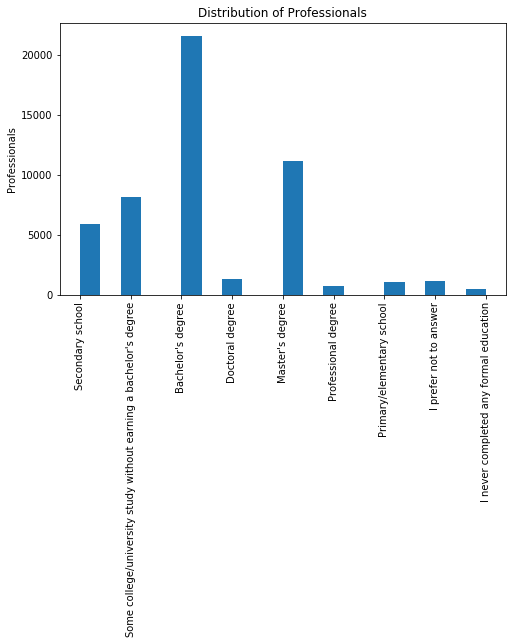

In [213]:
plt.figure(figsize=[8,5])
plt.hist(data = survey, x = 'FormalEducation', bins=20)
plt.xticks(rotation=90)
plt.ylabel('Professionals')
plt.title('Distribution of Professionals')
plt.show()

In [214]:
#Mask for professional developers
prof_dev = survey.query('Professional == "Professional developer"')

In [215]:
prof_with_degree.head(3)

,Country,EmploymentStatus,Professional,FormalEducation,CompanySize,Gender
2,United Kingdom,Employed full-time,Professional developer,Bachelor's degree,"10,000 or more employees",Male
3,United States,Employed full-time,Professional non-developer who sometimes write...,Doctoral degree,"10,000 or more employees",Male
4,Switzerland,Employed full-time,Professional developer,Master's degree,10 to 19 employees,N/A


####  Let's take a look at Professional Developers.

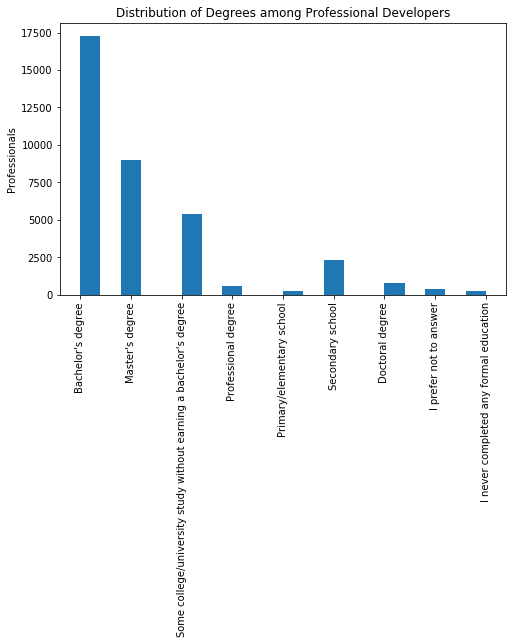

In [216]:
plt.figure(figsize=[8,5])
plt.hist(data = prof_dev, x = 'FormalEducation', bins=20)
plt.xticks(rotation=90)
plt.ylabel('Professionals')
plt.title('Distribution of Degrees among Professional Developers')
plt.show()

In [217]:
prof_dev['FormalEducation'].value_counts()/prof_dev.shape[0]

Bachelor's degree                                                    0.478536
Master's degree                                                      0.248623
Some college/university study without earning a bachelor's degree    0.149179
Secondary school                                                     0.063104
Doctoral degree                                                      0.021893
Professional degree                                                  0.015029
I prefer not to answer                                               0.010766
I never completed any formal education                               0.007224
Primary/elementary school                                            0.005646
Name: FormalEducation, dtype: float64

> The data shows that majority of professional developers are with a degree and there are also a few that does not have completed any formal education. 

> So having a degree helps in to be a developer. That does'nt mean you need to have a degree. Data also shows that there are professional developers without any graduate degrees.

### Which gender is dominant and has graduate degree as professional developers than the other? 

#### For simplicity we are going to group gender into 'Male' and 'Female'

In [218]:
# Let's create a  function to find the gender count
def gender_count(gender):
    gender_query = survey.query('Gender == @gender') 
    return gender_query.count()["Gender"]

In [219]:
gender_count("Male")

31589

In [220]:
gender_count("Female")

2600

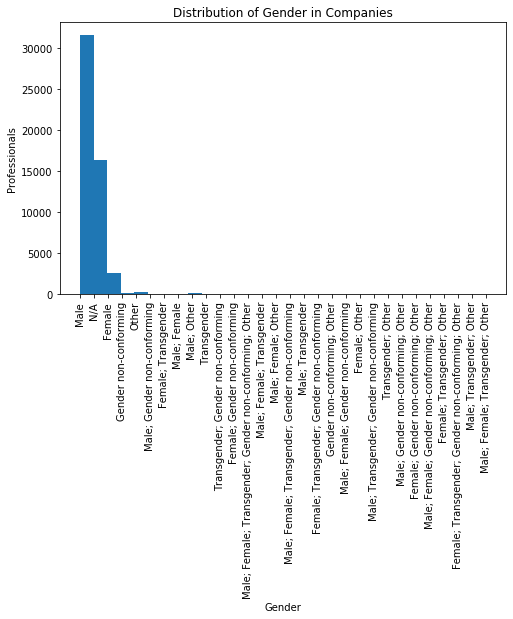

In [221]:
plt.figure(figsize=[8,5])
plt.hist(data = survey, x = 'Gender', bins=30)
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Professionals')
plt.title('Distribution of Gender in Companies')
plt.show()

#### Definitely in this survey the 'Male' gender is more in number and shows to be dominant . And there are not sufficient data to analyze and confirm further since  'N/A' is more than the 'Female' count. 

#### Let's see the with the information given which gender has more graduates.

In [222]:
#> Function for graduates count
def graduate_count(gender):
    # Mask for gender
    gender_query = survey.query('Gender == @gender') 
    # Dataset for graduates
    gender_graduate = gender_query.query('FormalEducation == "Bachelor\'s degree" or FormalEducation == "Master\'s degree" or FormalEducation == "Doctoral degree"')
    # Returns a total count of graduates
    return gender_graduate.count()['FormalEducation']

In [223]:
# Total count of Female graduates
graduate_count("Female")

2109

In [224]:
#Percentage of female graduates in the survey
female_degree.count()['FormalEducation']/df_female.count()

Country             0.811154
EmploymentStatus    0.811154
Professional        0.811154
FormalEducation     0.811154
CompanySize         0.811154
Gender              0.811154
dtype: float64

#### More than 80% of the females are graduates in this survey.

In [225]:
# Mask for males
df_male = survey.query('Gender == "Male"')
# Male graduates
male_degree = df_male.query('FormalEducation == "Bachelor\'s degree" or FormalEducation == "Master\'s degree" or FormalEducation == "Doctoral degree"')
# Total count of Male graduates
male_degree.count()['FormalEducation']

21243

In [226]:
#Percentage of male graduates in the survey
male_degree.count()['FormalEducation']/df_male.count()

Country             0.672481
EmploymentStatus    0.672481
Professional        0.672481
FormalEducation     0.672481
CompanySize         0.672481
Gender              0.672481
dtype: float64

#### 67% of males are graduates in this dataset.

#### The dataset above shows that male is more dominant  as professional developers and there are more female graduates than males.

### Does Formal Education affect in getting jobs in big size company?

In [227]:
survey['CompanySize'].value_counts()

N/A                         12470
20 to 99 employees           8587
100 to 499 employees         7274
10,000 or more employees     5680
10 to 19 employees           4103
1,000 to 4,999 employees     3831
Fewer than 10 employees      3807
500 to 999 employees         2486
5,000 to 9,999 employees     1604
I don't know                  869
I prefer not to answer        681
Name: CompanySize, dtype: int64

In [228]:
# Professionals with degree
prof_with_degree = survey.query('FormalEducation == "Bachelor\'s degree" or FormalEducation == "Master\'s degree" or FormalEducation == "Doctoral degree"')

In [229]:
# Count of professionals in big size companies
big_size_company = prof_with_degree.query('CompanySize == "1,000 to 4,999 employees" or CompanySize == "5,000 to 9,999 employees" or CompanySize == "10,000 or more employees"')

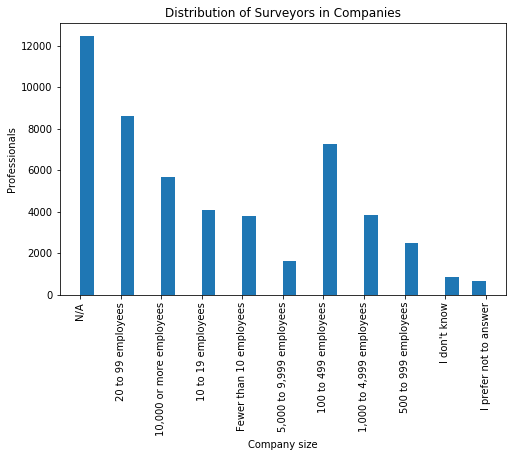

In [230]:
plt.figure(figsize=[8,5])
plt.hist(data = survey, x = 'CompanySize', bins=30)
plt.xticks(rotation=90)
plt.xlabel('Company size')
plt.ylabel('Professionals')
plt.title('Distribution of Surveyors in Companies')
plt.show()

### Professionals with degree in big companies

In [231]:
#Total percentage of professionals with degree
prof_with_degree.count()/survey.count()

Country             0.66271
EmploymentStatus    0.66271
Professional        0.66271
FormalEducation     0.66271
CompanySize         0.66271
Gender              0.66271
dtype: float64

#### 66% have degree in the form of Bachelor's, Master's or Doctoral

In [232]:
#Total % of Professionals with degree in big size companies
big_size_company.count()/prof_with_degree.count()

Country             0.26079
EmploymentStatus    0.26079
Professional        0.26079
FormalEducation     0.26079
CompanySize         0.26079
Gender              0.26079
dtype: float64

#### Out of the 66% with degree,  one-fourth (26%) are in big sized companies.

### Professionals without degree in big companies

In [233]:
#Total number of professionals without degree
prof_without_degree = survey.query('FormalEducation != "Bachelor\'s degree" and FormalEducation != "Master\'s degree" and FormalEducation != "Doctoral degree"')
#Total % of professionals with No degree
prof_without_degree.count()/survey.count()

Country             0.33729
EmploymentStatus    0.33729
Professional        0.33729
FormalEducation     0.33729
CompanySize         0.33729
Gender              0.33729
dtype: float64

#### About 34% does not a degree in the form of Bachelor's, Master's or Doctoral.

In [234]:
#Total % of Professionals with no degree in big size companies
big_size_company.count()/prof_without_degree.count()

Country             0.512403
EmploymentStatus    0.512403
Professional        0.512403
FormalEducation     0.512403
CompanySize         0.512403
Gender              0.512403
dtype: float64

#### Out of the 34% without the degree, more than half of them (51%) are employed in big size companies.

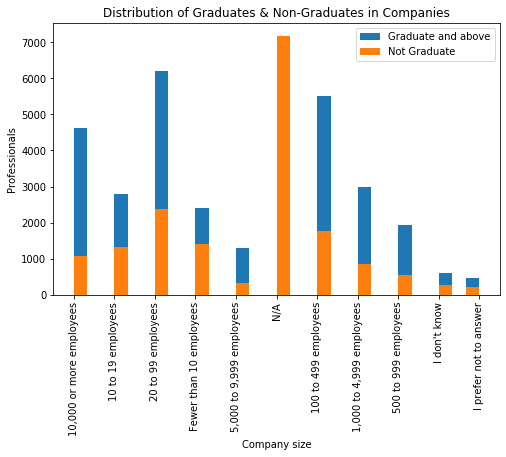

In [235]:
plt.figure(figsize=[8,5])
plt.hist(data = prof_with_degree, x = 'CompanySize', bins=30,label = 'Graduate and above')
plt.hist(data = prof_without_degree, x = 'CompanySize', bins=30, label = 'Not Graduate')
plt.xticks(rotation=90)
plt.xlabel('Company size')
plt.ylabel('Professionals')
plt.title('Distribution of Graduates & Non-Graduates in Companies')
plt.legend()
plt.show();

> The data from above shows that you can get employed in big size companies even if you do not have a graduate degree or above. 

> Overall you do not need to have a graduate degree to be employed in a big size company but having one helps. 